In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import yfinance as yf
from datetime import datetime as dt

In [3]:
df = yf.download('TLT', period='max', interval='1d')['Adj Close']
df_return = pd.DataFrame(df.pct_change().dropna())
df_return.rename(columns={'Adj Close': 'Return'}, inplace=True)
df_return['year'], df_return['month'], df_return['day'] = df_return.index.year, df_return.index.month, df_return.index.day
df_return.head()

[*********************100%%**********************]  1 of 1 completed


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/yfinance/utils.py:788: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Return,year,month,day
Date,,,,
2002-07-31,0.012389,2002,7,31
2002-08-01,0.005695,2002,8,1
2002-08-02,0.010241,2002,8,2
2002-08-05,0.004412,2002,8,5
2002-08-06,-0.008549,2002,8,6


Text(0, 0.5, 'Mean Return')

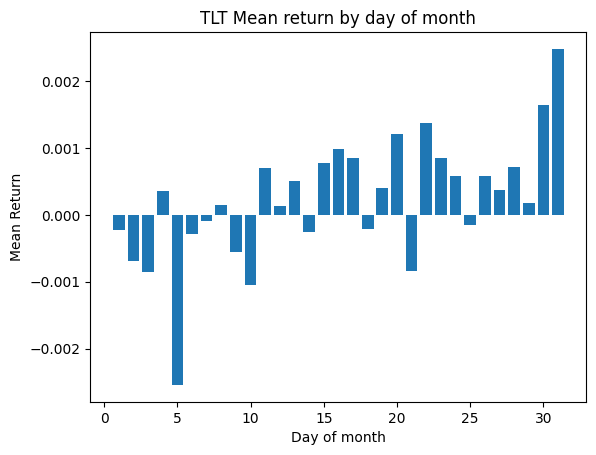

In [4]:
daily_return = df_return.groupby(df_return['day'])
dr = daily_return.Return.mean()
plt.bar(x = dr.index, height = dr)
plt.title('TLT Mean return by day of month')
plt.xlabel('Day of month')
plt.ylabel('Mean Return')

In [5]:
groups = df_return.groupby([df_return['year'], df_return['month']])
eom_group = groups.apply(lambda x: x.tail(5))
eom_group = eom_group.iloc[1:-5,]
eom_group = eom_group.reset_index(level=['year', 'month'], drop=True)

som_group = groups.apply(lambda x: x.head(5))
som_group = som_group.iloc[1:-5,]
som_group = som_group.reset_index(level=['year', 'month'], drop=True)
print(som_group)

              Return  year  month  day
Date                                  
2002-08-01  0.005695  2002      8    1
2002-08-02  0.010241  2002      8    2
2002-08-05  0.004412  2002      8    5
2002-08-06 -0.008549  2002      8    6
2002-08-07  0.002395  2002      8    7
...              ...   ...    ...  ...
2024-06-03  0.016174  2024      6    3
2024-06-04  0.011681  2024      6    4
2024-06-05  0.007338  2024      6    5
2024-06-06 -0.001500  2024      6    6
2024-06-07 -0.018346  2024      6    7

[1315 rows x 4 columns]


/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_52414/2472436716.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  eom_group = groups.apply(lambda x: x.tail(5))
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_52414/2472436716.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  som_group = groups.apply(lambda x: x.head(5))


- buy tlt 5 days before end of the month, short on the last day of the month, cover short 5 days into the month

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a s

                           Strategy
-------------------------  ----------
Start Period               2002-07-31
End Period                 2024-07-26
Risk-Free Rate             0.0%
Time in Market             48.0%

Cumulative Return          449.37%
CAGR﹪                     5.49%

Sharpe                     0.83
Prob. Sharpe Ratio         99.99%
Smart Sharpe               0.8
Sortino                    1.23
Smart Sortino              1.19
Sortino/√2                 0.87
Smart Sortino/√2           0.84
Omega                      1.22

Max Drawdown               -18.91%
Longest DD Days            493
Volatility (ann.)          10.0%
Calmar                     0.29
Skew                       0.01
Kurtosis                   6.16

Expected Daily %           0.03%
Expected Monthly %         0.64%
Expected Yearly %          7.69%
Kelly Criterion            9.6%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.0%
Expected Shortfall (cVaR)  -1.0%

Max Consecutive Wins       9
Max

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-09-30,2009-03-25,2009-10-30,396,-18.909056,-17.968473
2,2022-11-25,2023-02-02,2023-09-01,281,-17.191014,-16.740435
3,2011-05-02,2011-09-28,2012-09-05,493,-15.420626,-14.204910
4,2023-10-25,2023-12-06,2024-07-26,276,-11.356795,-11.001438
5,2020-03-03,2020-05-28,2021-02-02,337,-10.805325,-10.311059


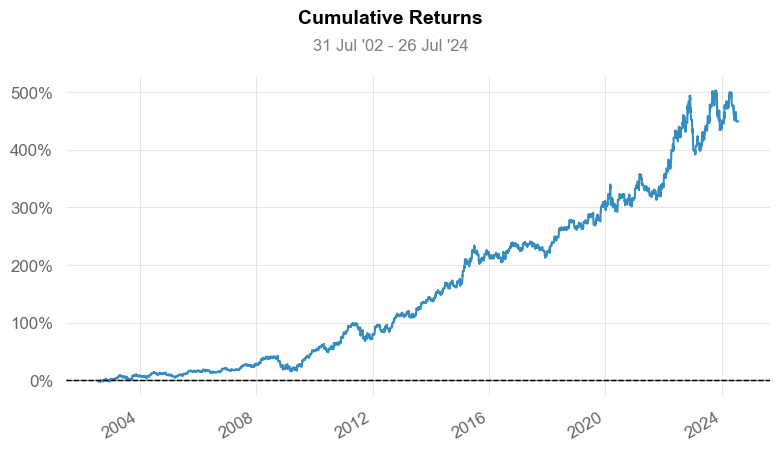

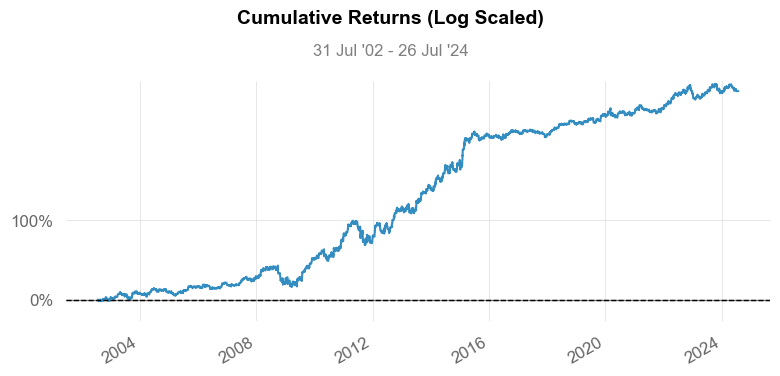

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/quantstats/_plotting/wrappers.py:565: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").apply(_stats.comp)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/quantstats/_plotting/wrappers.py:568: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  returns = returns.resample("A").last()


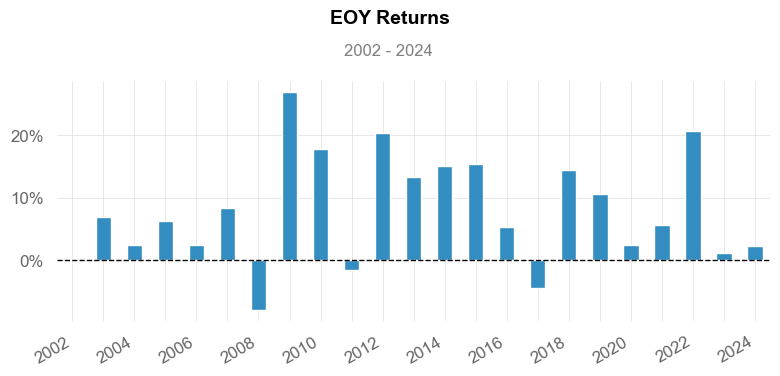

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/quantstats/_plotting/core.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  returns.fillna(0).resample(resample).apply(apply_fnc).resample(resample).last()


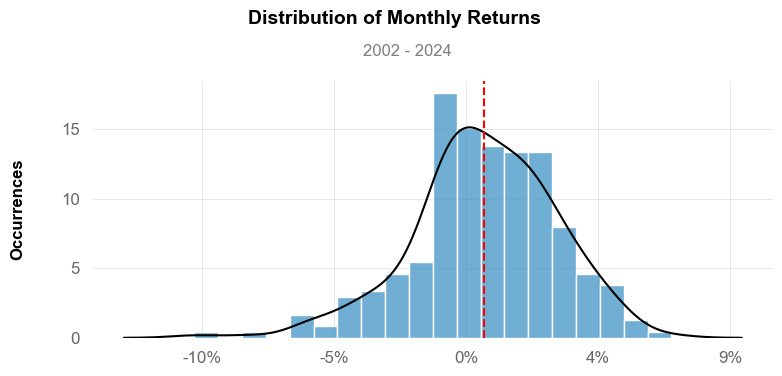

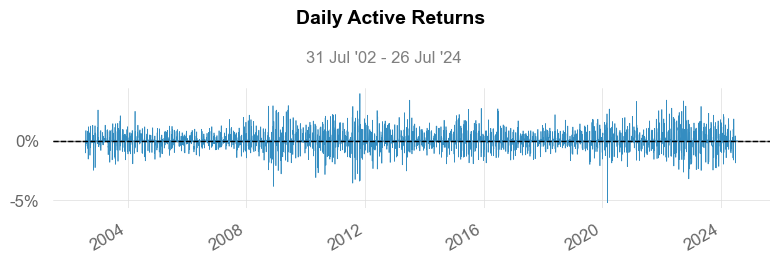

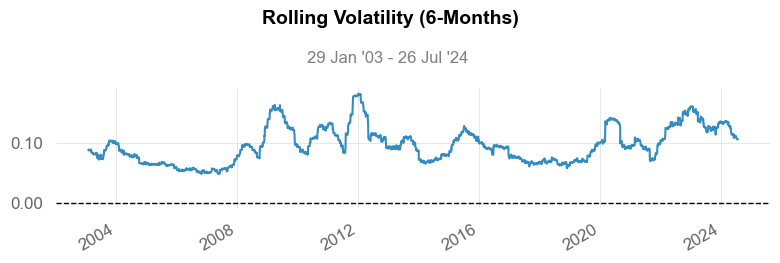

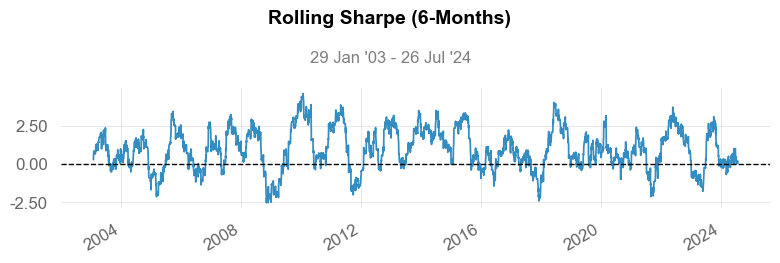

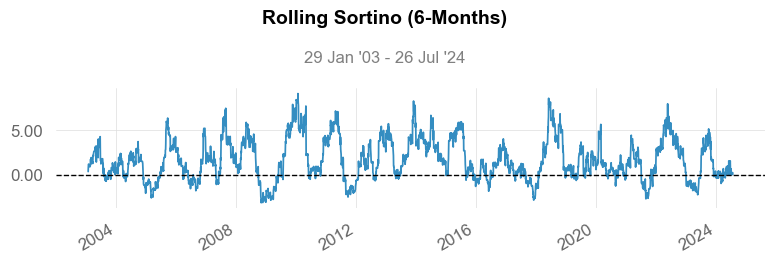

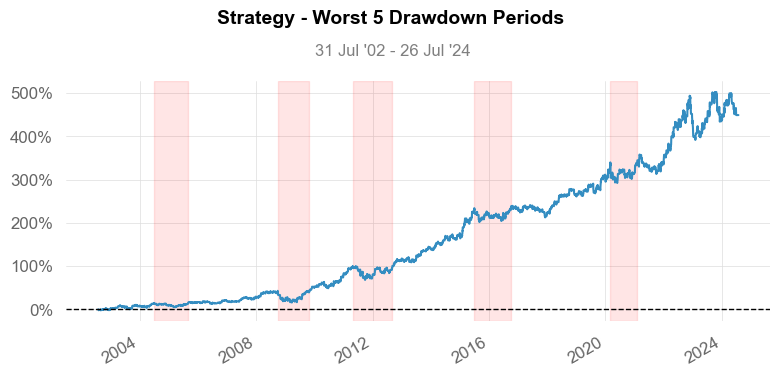

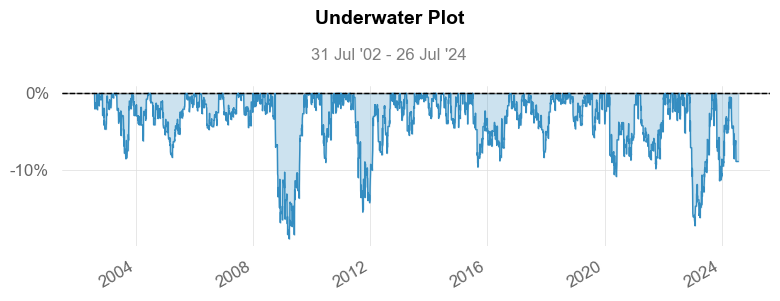

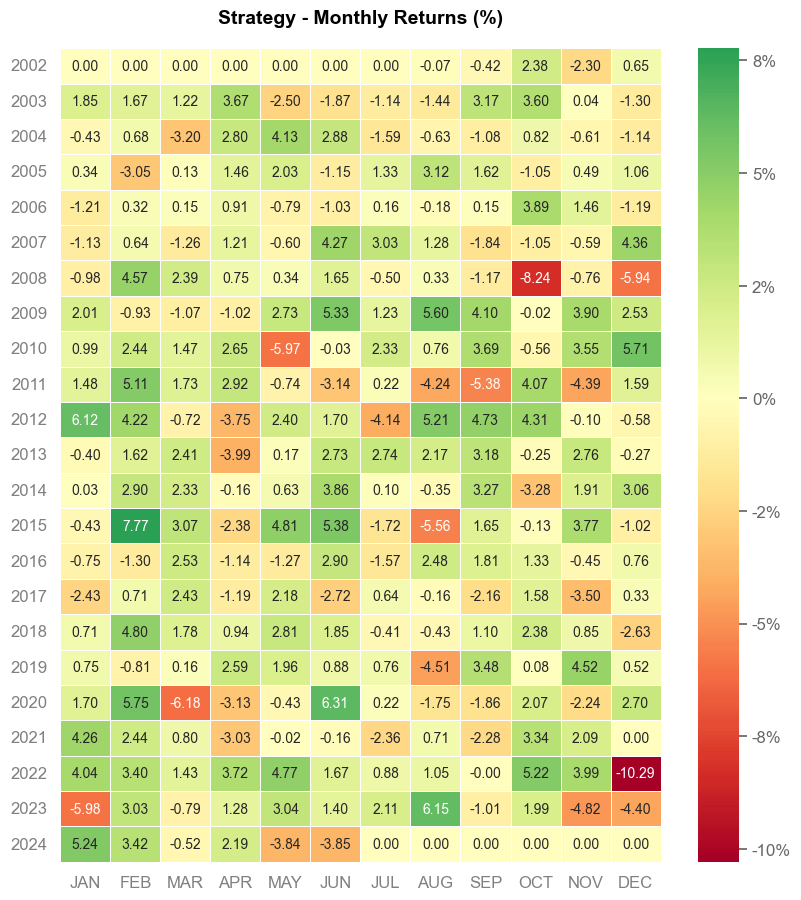

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/quantstats/_plotting/core.py:1016: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  port["Weekly"].ffill(inplace=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/quantstats/_plotting/core.py:1018: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  port["Monthly"] = port["Daily"].resample("M").apply(apply_fnc)
/Library/Frameworks/Python.framework/Versions/3.12/lib/py

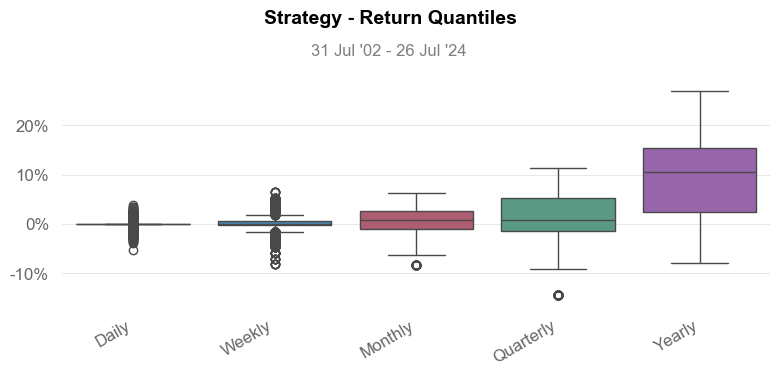

In [6]:
short_dates = list(som_group.index)
long_dates = list(eom_group.index)
df_return['Strategy Return'] = 0.0

short_mask = df_return.index.isin(short_dates)
long_mask = df_return.index.isin(long_dates)
df_return.loc[short_mask, 'Strategy Return'] = df_return.loc[short_mask, 'Return'] * -1
df_return.loc[long_mask, 'Strategy Return'] = df_return.loc[long_mask, 'Return']
strategy = (1 + df_return['Strategy Return']).cumprod()

import quantstats as qs

qs.reports.full(strategy)

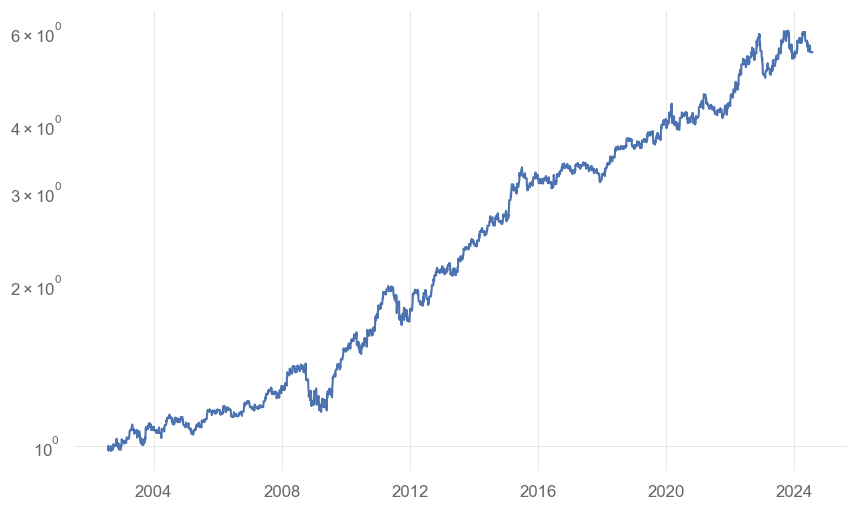

In [8]:
plt.plot(strategy)
plt.yscale('log')